**Import the necessary libraries:**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

2024-02-29 07:52:22.400620: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 07:52:22.400737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 07:52:22.526674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Check our train and test data:**

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

**Dropped the id column:**

In [3]:
train_data= train_data.drop('id', axis = 1)
test_data = test_data.drop('id', axis = 1)

**Take a look at the number of rows and columns our train and test data had:**

In [4]:
train_data.shape, test_data.shape

((20758, 17), (13840, 16))

**Visual representation of our Train and test data are as:**

In [5]:
display('Train', train_data.head())
display('Test', test_data.head())

'Train'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


'Test'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Lets check how many people have family history with overweight:**

In [16]:
train_data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

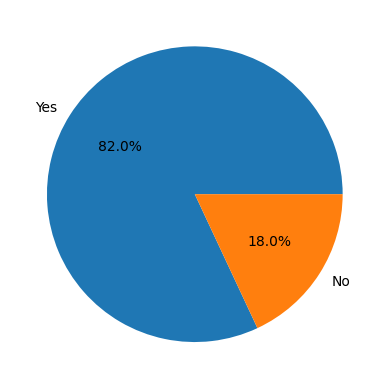

In [12]:
plt.pie(train_data['family_history_with_overweight'].value_counts(), autopct='%1.1f%%', labels = ['Yes', 'No']);

**Lets check how many people smoke or not:**

In [14]:
train_data['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

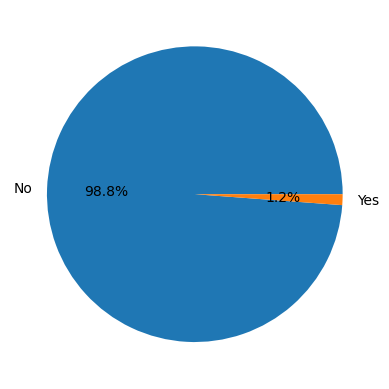

In [15]:
plt.pie(train_data['SMOKE'].value_counts(), autopct='%1.1f%%', labels = ['No', 'Yes']);

In [9]:
train_data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

**Info of train data:**

In [7]:
train_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

**Info of test data:**

In [8]:
test_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

**No null values in Train Data:**

In [9]:
train_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**No null values in Test Data:**

In [10]:
test_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**No duplicated value in train and test data:**

In [11]:
train_data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

**Pop out label column:**

In [12]:
y = train_data.pop('NObeyesdad')
y.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

**Encode our labels:**

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([6, 1, 0, ..., 3, 6, 3])

**Check the shape of train data and labels**

In [14]:
train_data.shape, y.shape

((20758, 16), (20758,))

In [15]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [16]:
test_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Check which columns are num. cols and which are cat. cols:**

In [17]:
import numpy as np
cat_cols = list(train_data.select_dtypes(exclude = np.number).columns)
num_cols = list(train_data.select_dtypes(include = np.number).columns)
print(f"Columns wihtout num dtypes :\n {cat_cols}\n\n Columns with num dtypes :\n {num_cols}")

Columns wihtout num dtypes :
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

 Columns with num dtypes :
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


**Encode our columns using column transformer:**

In [18]:
column_transformer = ColumnTransformer([
    ("scaler", StandardScaler(), num_cols), 
    ("ohc_encoder", OneHotEncoder(handle_unknown='ignore'), cat_cols), 
], remainder = "passthrough")
column_transformer.fit(train_data)
train_data = column_transformer.transform(train_data)
test_data = column_transformer.transform(test_data)

In [19]:
train_data.shape, test_data.shape

((20758, 30), (13840, 30))

**Split our data into train and val sets:**

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, y, stratify = y, test_size = 0.3, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14530, 30), (6228, 30), (14530,), (6228,))

**This is a function to visualise our model's predictions:**

In [21]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

**created model 1:**

In [22]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation = 'relu'), 
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(loss= 'sparse_categorical_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                          metrics=['accuracy'])

history_1 = model_1.fit(X_train, 
                        y_train, 
                        epochs=100, 
                        validation_data = (X_val, y_val),
                        callbacks = tf.keras.callbacks.EarlyStopping(patience = 5, 
                                                                     monitor = 'val_loss', 
                                                                     restore_best_weights = True))

Epoch 1/100


I0000 00:00:1709190855.688039     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


455/455 [==============================] - 4s 4ms/step - loss: 0.9787 - accuracy: 0.6495 - val_loss: 0.5641 - val_accuracy: 0.8017
Epoch 2/100
455/455 [==============================] - 2s 4ms/step - loss: 0.4744 - accuracy: 0.8312 - val_loss: 0.4307 - val_accuracy: 0.8502
Epoch 3/100
455/455 [==============================] - 2s 4ms/step - loss: 0.4065 - accuracy: 0.8584 - val_loss: 0.4024 - val_accuracy: 0.8610
Epoch 4/100
455/455 [==============================] - 2s 4ms/step - loss: 0.3911 - accuracy: 0.8630 - val_loss: 0.3890 - val_accuracy: 0.8626
Epoch 5/100
455/455 [==============================] - 2s 4ms/step - loss: 0.3814 - accuracy: 0.8692 - val_loss: 0.3789 - val_accuracy: 0.8680
Epoch 6/100
455/455 [==============================] - 2s 4ms/step - loss: 0.3750 - accuracy: 0.8692 - val_loss: 0.3800 - val_accuracy: 0.8685
Epoch 7/100
455/455 [==============================] - 2s 4ms/step - loss: 0.3678 - accuracy: 0.8742 - val_loss: 0.3775 - val_accuracy: 0.8709
Epoch 8/100

**Loss curves of model 1:**

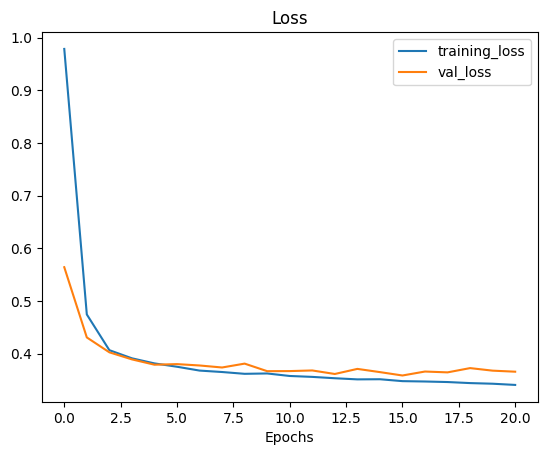

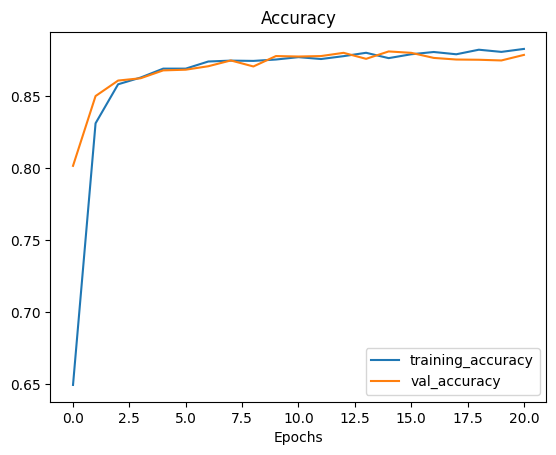

In [23]:
plot_loss_curves(history_1)

**Prediction of model 1 on val data:**

In [24]:
model_1_preds = tf.argmax(model_1.predict(X_val), axis = 1)

195/195 [==============================] - 0s 1ms/step


In [25]:
test_data.shape

(13840, 30)

**Created model 2 lowered the learning rate:**

In [28]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model_2.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.0001), metrics = ['accuracy'])
history_2 = model_2.fit(X_train, 
                        y_train, 
                        epochs=100, 
                        validation_data = (X_val, y_val),
                        callbacks = tf.keras.callbacks.EarlyStopping(patience = 5, 
                                                                     monitor = 'val_loss', 
                                                                     restore_best_weights = True))

Epoch 1/100
455/455 [==============================] - 5s 4ms/step - loss: 1.7727 - accuracy: 0.3495 - val_loss: 1.1415 - val_accuracy: 0.5690
Epoch 2/100
455/455 [==============================] - 2s 4ms/step - loss: 1.1315 - accuracy: 0.5487 - val_loss: 0.8215 - val_accuracy: 0.6904
Epoch 3/100
455/455 [==============================] - 2s 4ms/step - loss: 0.9230 - accuracy: 0.6122 - val_loss: 0.7015 - val_accuracy: 0.7420
Epoch 4/100
455/455 [==============================] - 2s 4ms/step - loss: 0.8263 - accuracy: 0.6542 - val_loss: 0.6270 - val_accuracy: 0.7681
Epoch 5/100
455/455 [==============================] - 2s 4ms/step - loss: 0.7515 - accuracy: 0.6864 - val_loss: 0.5675 - val_accuracy: 0.7966
Epoch 6/100
455/455 [==============================] - 2s 4ms/step - loss: 0.6951 - accuracy: 0.7141 - val_loss: 0.5322 - val_accuracy: 0.8094
Epoch 7/100
455/455 [==============================] - 2s 4ms/step - loss: 0.6571 - accuracy: 0.7284 - val_loss: 0.5057 - val_accuracy: 0.8060

**Model 2 loss curves:**

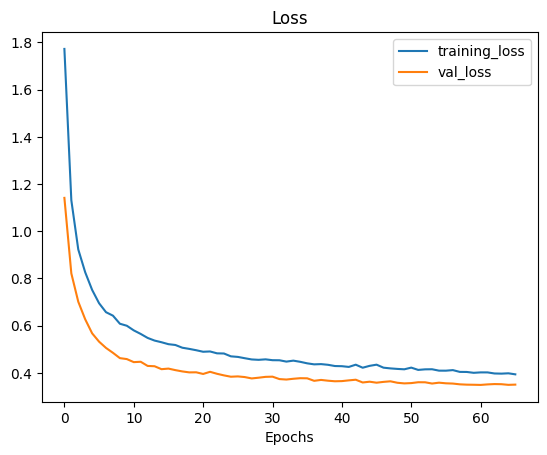

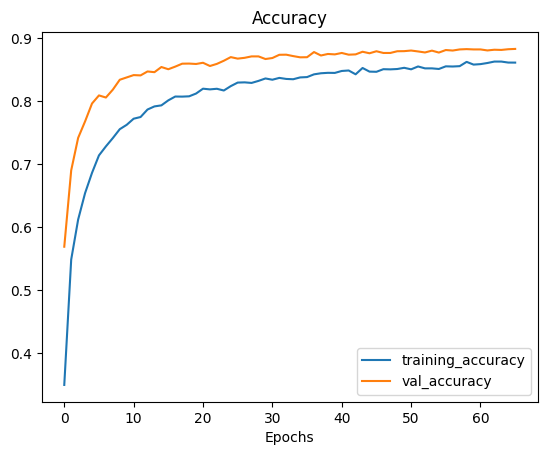

In [29]:
plot_loss_curves(history_2)

**Model 2 prediction on val data:**

In [30]:
model_2_preds = tf.argmax(model_2.predict(X_val), axis = 1)

195/195 [==============================] - 0s 1ms/step


**Make predictions on test data:**

In [33]:
test_preds_model_2 = tf.argmax(model_2.predict(test_data), axis = 1)

433/433 [==============================] - 1s 1ms/step


**Model 2 preds:**

In [34]:
test_preds_model_2

<tf.Tensor: shape=(13840,), dtype=int64, numpy=array([3, 5, 4, ..., 0, 1, 3])>

**Create a function to calculate the result:**

In [35]:
def calculate_result(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1score, _ = precision_recall_fscore_support(y_true, y_pred)
    return {'accuracy':accuracy, 
            'precision': tf.reduce_mean(precision).numpy(),
            'recall' : tf.reduce_mean(recall).numpy(),
            'f1score' : tf.reduce_mean(f1score).numpy()}

**Model_1 result:**

In [36]:
model_1_results = calculate_result(y_val, model_1_preds)
model_1_results

{'accuracy': 0.880218368657675,
 'precision': 0.8675710353963284,
 'recall': 0.8671529472959042,
 'f1score': 0.866685966034917}

**Model_2 result:**

In [37]:
model_2_results = calculate_result(y_val, model_2_preds)
model_2_results

{'accuracy': 0.882466281310212,
 'precision': 0.869823585917915,
 'recall': 0.86937423897688,
 'f1score': 0.8693486509404816}

**Combine both model results**

In [38]:
both_model_result = pd.DataFrame({'model_1_result' : model_1_results,
                                 'model_2_result' : model_2_results}).T
both_model_result

,accuracy,precision,recall,f1score
model_1_result,0.880218,0.867571,0.867153,0.866686
model_2_result,0.882466,0.869824,0.869374,0.869349


**Plot the result of both the models:**

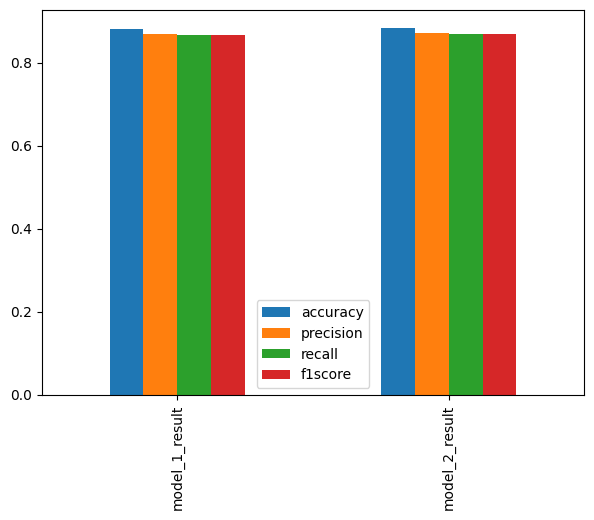

In [39]:
both_model_result.plot(kind = 'bar', figsize = (7, 5));

**Load submission ids:**

In [40]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
submission['id']

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

**Make our submissions to csv:**

In [41]:
submission['NObeyesdad'] = test_preds_model_2
submission.to_csv("submission_ver_2.csv", index=False)

In [42]:
pd.read_csv('/kaggle/working/submission_ver_2.csv')

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4
...,...,...
13835,34593,6
13836,34594,1
13837,34595,0
13838,34596,1
